#Dataset Creation

In [1]:
from nltk import corpus

In [131]:
from nltk.corpus import brown, treebank


In [120]:
import nltk
nltk.download('brown')
nltk.download("treebank")
nltk.download("punkt")

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.


True

In [132]:
senti= brown.sents()
sents2= treebank.sents()
sents= senti+sents2
sents=list(sents)

In [6]:
#get 10 wikipedia articles to include more options}
!pip install wikipedia-api wikipedia
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia(
        language='en',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

wiki_1 = wiki_wiki.page("Opsin")
wiki_2 = wiki_wiki.page("Brown Bear")
wiki_3 = wiki_wiki.page("United Kingdom")
wiki_4 = wiki_wiki.page("Spain")
wiki_5 = wiki_wiki.page("PewDiePie")
wiki_6 = wiki_wiki.page("Civil conflict in the Philippines")
wiki_7 = wiki_wiki.page("Domenico Brescia")
wiki_8 = wiki_wiki.page("Qantara, Lebanon")
wiki_9 = wiki_wiki.page("Alright, Still")
wiki_10 = wiki_wiki.page("Chesterfield F.C.")
wiki_11 =wiki_wiki.page("France")
wiki_12 =wiki_wiki.page("United States")
texts= [wiki_1,wiki_2,wiki_3,wiki_4,wiki_5,wiki_6,wiki_7,wiki_8,wiki_9,wiki_10]

def clean(article): 
  data= article.text.split(".")
  for d in data:
    if d == "" or len(d)>0:
      data.remove(d)
    elif d== " ":
      data.remove(d)
    elif "\n" in d:
      d.replace("\n", "")
      
  return data

articles=[]

for text in texts:
  cleaned= clean(text)
  articles.append(cleaned)


import nltk
final_articles=[]
for article in articles:
  for a in article:
    tokens= nltk.tokenize.word_tokenize(a)
    final_articles.append(tokens)




  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-py3-none-any.whl size=13477 sha256=089cca2baf7bbb4bd2f26ebc82e552986d6ec0594375451eefb9921350af33d4
  Stored in directory: /root/.cache/pip/wheels/d3/24/56/58ba93cf78be162451144e7a9889603f437976ef1ae7013d04
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=3eeaff6198240cad0a09d5b8a80ab79d81560833e5da5ab02ae20dfa513cc8ff
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia-api wikipedia


In [9]:
#Delete lines from wikipedia articles with no content (cause error in the model)
for i,f in enumerate(final_articles):
  if f == "" or f == " ":
    print("espacio: ", f)
  elif len(f) <= 0:
    del final_articles[i]
    print("none: ", i, f)

In [145]:
#Concatenate some sentences so that the model learn periods and also full stops

all=[]
for i,sent in enumerate(sents):
  temp=[]
  if (i % 2) == 0:
    #even
    temp.append(sent+sents[i+1])
  else:
    temp.append(sent)
  all+=temp


In [41]:
#Conll tagging but with tags P: period/fullstop | C: comma | I: all the rest.
#the function tags the word before where a comma/period is and deleted the comma/period.
def conll_tagging(lista):
    tagged_list=[]
  #for char in lista:
    temp=[]
    for i,c in enumerate(lista):
      if c == ".":
        #temp.append([c, "P"])
        continue
      if c == ",":
        #temp.append([c, "C"])
        continue
      if len(lista)> i+1:
        if lista[i+1] == ".":
          temp.append([lista[i], "P"])
        elif lista[i+1] == ",":
          temp.append([lista[i], "C"])
        else:
          temp.append([c, "I"])
      else:
        temp.append([c, "I"])

    tagged_list.append(temp)
    return tagged_list

In [150]:
final_list= final_articles +sents

def build_dataset(final):
  total=[]
  for sent in final:
    exa= conll_tagging(sent)
    sent=[]
    tempa=[]
    for f in exa:
      temp=[]
      for t in f:
        sent.append(t[0])
        tempa.append(t[1])
    if len(sent) == len(tempa):
      total.append([sent, tempa])
    else:
      continue
  return total

total=build_dataset(final_list)

In [151]:
'''
Write a file on CONLL format in .txt with all the lists
'''
from tqdm import tqdm
with open("brown_char.tsv", "a+") as f:

  for i in tqdm(range(len(total)),desc="Loading…",ascii=False, ncols=100):
    sent=" ".join(total[i][0])
    tag=" ".join(total[i][1])
    f.write(sent+"\t"+tag+"\n")

Loading…: 100%|███████████████████████████████████████████| 62765/62765 [00:00<00:00, 323584.21it/s]


In [153]:
with open("brown_char.tsv", "r") as f:
  filea= f.readlines()

#Total number of characters tagged.
print(len(filea))


62765


In [ ]:
'''
Example of annotated sentences:

Sent= ['they', 'had', 'won', 'promotion', 'the', 'previous', 'season', 'the', 'first' 'Welsh','team']
tag= ["I", "I","I","I","I","I","C","I","I","P"]
"they had won promotion the previous season, the first Welsh team." 

'''

0

#LSMT

In [1]:
!pip install pytorch torchtext==0.10.0

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-jr4f45l5/pytorch_dc60e5affb424a14b2b6991b9f36c0b6/setup.py'"'"'; __file__='"'"'/tmp/pip-install-jr4f45l5/pytorch_dc60e5affb424a14b2b6991b9f36c0b6/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-ma64mehn/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pytorch Check the logs for full command output.


In [2]:
!pip install pytorch-crf

import time
import torch
from torch import nn
from torch.optim import Adam
from torchtext.vocab import Vocab

import torch
import torch.nn as nn
import torch.optim as optim

from torchtext import data
from torchtext import datasets

import spacy
from torchcrf import CRF
import numpy as np
import pandas as pd

import time
import random
import string
from itertools import chain

In [3]:
import torch
from torchtext.legacy import data
from tqdm import tqdm
import random
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

#No lower to use capitals as a feature
TEXT = data.Field(lower = False)
TAG = data.Field(unk_token = None) 


In [4]:
fields = [('text', TEXT),('label', TAG)]

train_data = data.TabularDataset(
    path="/content/brown_char.tsv",
    format='tsv',
    fields=fields,
    skip_header= False,
)

In [6]:
#Test split
import random
train_data, test_data = train_data.split(split_ratio=0.7, random_state = random.seed(SEED))

In [7]:
#Validation Split
train_data, valid_data = train_data.split(random_state = random.seed(42))

In [8]:
print(vars(train_data.examples[5]))

{'text': ['At', 'one', 'point', 'Hammersmith', 'is', 'reported', '*-1', 'to', 'have', 'accounted', 'for', 'as', 'much', 'as', '10', '%', 'of', 'the', 'sterling', 'market', 'in', 'interest-rate', 'swap', 'dealings'], 'label': ['I', 'I', 'C', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'P']}


In [9]:
MIN_FREQ= 0 #To use all of the features
TEXT.build_vocab(train_data, 
                 min_freq = MIN_FREQ,
                 vectors = "glove.6B.100d", #pretrained embeddings 100 dimensions
                 unk_init = torch.Tensor.normal_)


TAG.build_vocab(train_data)

In [10]:
#Adding an "O" tag for the metrics.
TAG.vocab.itos.insert(4, "O")
TAG.vocab.stoi["O"]= 4

In [13]:
#to use the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
BATCH_SIZE = 32
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    device = device,
    sort=False    )

In [15]:
# padding index
text_pad_id= TEXT.vocab.stoi[TEXT.pad_token]  
tag_pad_id= TAG.vocab.stoi[TAG.pad_token]

In [16]:
class BiLSTMSEG(nn.Module):
    def __init__(self, 
                 input_dim, 
                 embedding_dim, 
                 hidden_dim, 
                 output_dim, 
                 n_layers, 
                 bidirectional, 
                 dropout, 
                 pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx = pad_idx)
        
        self.lstm = nn.LSTM(embedding_dim, 
                            hidden_dim, 
                            num_layers = n_layers, 
                            bidirectional = bidirectional,
                            dropout = dropout if n_layers > 1 else 0)
        
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):

        #text = [sent len, batch size]
        embedded = self.dropout(self.embedding(text)) 
        #embedded = [sent len, batch size, emb dim]
        
        outputs, (hidden, cell) = self.lstm(embedded)
        #output = [sent len, batch size, hid dim * n directions]
        #hidden/cell = [n layers * n directions, batch size, hid dim]
   
        predictions = self.fc(self.dropout(outputs))
        #predictions = [sent len, batch size, output dim]
        
        return predictions

In [17]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100 #Same as GLOVE pretrained embeddings
HIDDEN_DIM = 128
OUTPUT_DIM = len(TAG.vocab)
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = BiLSTMSEG(INPUT_DIM, 
                        EMBEDDING_DIM, 
                        HIDDEN_DIM, 
                        OUTPUT_DIM, 
                        N_LAYERS, 
                        BIDIRECTIONAL, 
                        DROPOUT, 
                        PAD_IDX)
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean = 0, std = 0.1)
        
model.apply(init_weights)
#Use of glove pretrained embeddings
pretrained_embeddings = TEXT.vocab.vectors
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)



In [18]:

def optimizer(model, lr=1e-4, eps=1e-6, weight_decay_rate=0.001, second_weight_decay_rate=0.0):
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
            'weight_decay_rate': weight_decay_rate},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
            'weight_decay_rate': second_weight_decay_rate}]
    return optim.Adam(
        optimizer_grouped_parameters,
        lr=lr,
        eps=eps
    )

optimizer = optimizer(model, lr=1e-4, eps=1e-6, weight_decay_rate=0.001, second_weight_decay_rate=0.0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
TAG_PAD_IDX = TAG.vocab.stoi[TAG.pad_token]
criterion = nn.CrossEntropyLoss(ignore_index = TAG_PAD_IDX)

model = model.to(device)
criterion = criterion.to(device)

In [19]:
from sklearn.metrics import f1_score, classification_report

def f1_loss( preds, y, tag_pad_idx, full_report=False):
    index_o = TAG.vocab.stoi["O"]

    positive_labels = [i for i in range(len(TAG.vocab.itos))
                       if i not in (tag_pad_idx, index_o)]
    _, pred = torch.max(preds, 1)
    flatten_preds = pred.data.cpu().numpy() 
    flatten_y = y.data.cpu().numpy()
    if full_report:
  
        positive_names = [TAG.vocab.itos[i]
                              for i in range(len(TAG.vocab.itos))
                              if i not in (tag_pad_idx, index_o)]
        print(classification_report(
                y_true=flatten_y,
                y_pred=flatten_preds,
                labels=positive_labels,
                target_names=positive_names
            ))
    return f1_score(
            y_true=flatten_y,
            y_pred=flatten_preds,
            labels=positive_labels,
            average="micro"
        ), flatten_preds, flatten_y

In [20]:
def train(model, iterator, optimizer, criterion, tag_pad_idx):
     
    epoch_loss = 0
    epoch_f1 = 0
      
    model.train()
    
    for batch in iterator:
        
        text = batch.text
        tags = batch.label

        optimizer.zero_grad()
        
        #text = [sent len, batch size]
        
        predictions = model(text)
        
        #predictions = [sent len, batch size, output dim]
        #tags = [sent len, batch size]
        
        predictions = predictions.view(-1, predictions.shape[-1])
        tags = tags.view(-1)
        
        #predictions = [sent len * batch size, output dim]
        #tags = [sent len * batch size]
        
        loss = criterion(predictions, tags)

        
        f1,_,_ = f1_loss(predictions, tags, tag_pad_idx, full_report=False)
        
        loss.backward()
        
        optimizer.step()

        epoch_loss += loss.item()
        epoch_f1 += f1.item()
        
    return epoch_loss / len(iterator), epoch_f1 / len(iterator)

In [21]:
def evaluate(model, iterator, criterion, tag_pad_idx, full_report):
    
    epoch_loss = 0
    epoch_f1 = 0
    
    model.eval()
    preds = []
    labels = []
    with torch.no_grad():
    
        for batch in iterator:

            text = batch.text
            tags = batch.label
            
            predictions = model(text)
            
            predictions = predictions.view(-1, predictions.shape[-1])
            tags = tags.view(-1)
            
            loss = criterion(predictions, tags)
            
            
            f1, _, _ = f1_loss(predictions, tags, tag_pad_idx, full_report)
            _, pred = torch.max(predictions, 1)
            flatten_preds = pred.data.cpu().numpy() 
            flatten_y = tags.data.cpu().numpy()
            preds.append(flatten_preds)
            labels.append(flatten_y)
            epoch_loss += loss.item()
            epoch_f1 += f1.item()
        
    return epoch_loss / len(iterator), epoch_f1 / len(iterator), preds, labels


In [22]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

N_EPOCHS = 50

t_loss = []
t_f1 = []
v_loss = []
v_f1 = []

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
   
    
    train_loss, train_f1 = train(model, train_iterator, optimizer, criterion, TAG_PAD_IDX)
    t_loss.append(train_loss)
    t_f1.append(train_f1) 
    
    valid_loss, valid_f1,_,_ = evaluate(model, valid_iterator, criterion, TAG_PAD_IDX, full_report= False)
    v_loss.append(valid_loss)
    v_f1.append(valid_f1)
    
    scheduler.step()
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'sentence_segmenter.pt')
    

    if epoch%10 == 0: 
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train F1 score: {train_f1*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. F1 score: {valid_f1*100:.2f}%')


Epoch: 01 | Epoch Time: 0m 32s
	Train Loss: 0.367 | Train F1 score: 48.51%
	 Val. Loss: 0.274 |  Val. F1 score: 49.57%
Epoch: 11 | Epoch Time: 0m 20s
	Train Loss: 0.191 | Train F1 score: 50.59%
	 Val. Loss: 0.177 |  Val. F1 score: 50.60%
Epoch: 21 | Epoch Time: 0m 20s
	Train Loss: 0.177 | Train F1 score: 50.76%
	 Val. Loss: 0.167 |  Val. F1 score: 50.73%
Epoch: 31 | Epoch Time: 0m 20s
	Train Loss: 0.172 | Train F1 score: 50.41%
	 Val. Loss: 0.164 |  Val. F1 score: 50.78%
Epoch: 41 | Epoch Time: 0m 20s
	Train Loss: 0.171 | Train F1 score: 50.62%
	 Val. Loss: 0.161 |  Val. F1 score: 50.81%


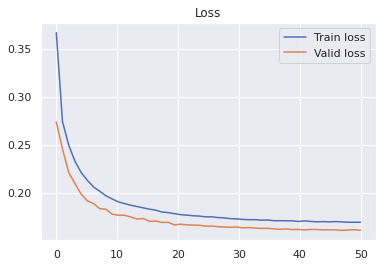

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
sns.set()

x = np.linspace(0, N_EPOCHS,N_EPOCHS)

plt.plot(x,t_loss)
plt.plot(x,v_loss)
plt.title("Loss")
plt.legend(["Train loss", "Valid loss"])

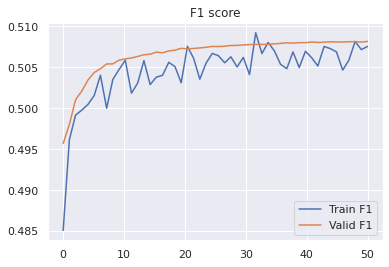

In [42]:
x = np.linspace(0, N_EPOCHS,N_EPOCHS)

plt.plot(x,t_f1)
plt.plot(x,v_f1)
plt.title("F1 score")
plt.legend(["Train F1", "Valid F1"])

In [43]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
model.load_state_dict(torch.load('sentence_segmenter.pt'))

test_loss, test_f1, preds, labels = evaluate(model, test_iterator, criterion, TAG_PAD_IDX,full_report=False)
print(f'Test Loss: {test_loss:.3f} |  Test F1 score: {test_f1*100:.2f}%')

Test Loss: 0.162 |  Test F1 score: 50.90%


In [26]:
predict =  [item for sublist in preds for item in sublist]
true =  [item for sublist in labels for item in sublist]
confusion = confusion_matrix(true, predict)

In [27]:
confusion

array([[     0,     29,      0, 935936],
       [     0, 469628,   2505,   1906],
       [     0,  23874,   4957,    525],
       [     0,   1608,    205,  22238]])

In [28]:
TAG.vocab.stoi

defaultdict(None, {'<pad>': 0, 'C': 2, 'I': 1, 'O': 4, 'P': 3})

Classification Report:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           4     0.0000    0.0000    0.0000         0
           3     0.0231    0.9246    0.0452     24051
           2     0.6465    0.1689    0.2678     29356
           1     0.9485    0.9907    0.9691    474039

   micro avg     0.3395    0.9419    0.4991    527446
   macro avg     0.4045    0.5210    0.3205    527446
weighted avg     0.8895    0.9419    0.8880    527446



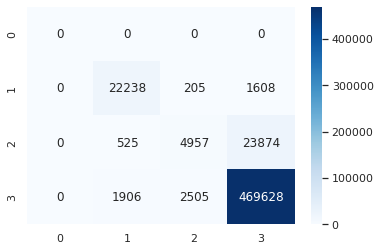

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(true, predict, labels=[4, 3, 2, 1], digits=4))
    
cm = confusion_matrix(true, predict, labels=[4, 3, 2, 1])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

#Save model's vocab and full model

In [30]:
def save_vocab(vocab, path):
    import pickle
    output = open(path, 'wb')
    pickle.dump(vocab, output)
    output.close()

save_vocab(TEXT.vocab,"/content/vocab.pkl")
save_vocab(TAG.vocab,"/content/vocab_tag.pkl")


In [31]:
#Save full model
#Previously was saved only the state_dic this model works in case I need to resume training
torch.save(model, '/content/tut3-model_conll_full.pt')

#Inference

In [32]:
import pickle
vocab_text_p= "/content/vocab.pkl"
vocab_tag_p= "/content/vocab_tag.pkl"
vocabulary_text=pickle.load(open(vocab_text_p, "rb"))
vocabulary_tag=pickle.load(open(vocab_tag_p, "rb"))

In [33]:
vocabulary_text.stoi["<unk>"]

0

In [44]:
#device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# padding index
text_pad_id= vocabulary_text.stoi["<pad>"]  
tag_pad_id= vocabulary_tag.stoi["<pad>"]
#model instance
model = BiLSTMSEG(INPUT_DIM, 
                        EMBEDDING_DIM, 
                        HIDDEN_DIM, 
                        OUTPUT_DIM, 
                        N_LAYERS, 
                        BIDIRECTIONAL, 
                        DROPOUT, 
                        PAD_IDX).to(device)
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean = 0, std = 0.1)
        
model.apply(init_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.load_state_dict(torch.load('sentence_segmenter.pt'))



<All keys matched successfully>

In [46]:
def tag_sentence(model, device, sentence, text_field, tag_field):
    
    model.eval()
    sentence3 =sentence3[0].split(" ")    
        
    numericalized_tokens = [text_field.vocab.stoi[t] for t in tokens]

    unk_idx = text_field.vocab.stoi[text_field.unk_token]
    
    unks = [t for t, n in zip(tokens, numericalized_tokens) if n == unk_idx]
    
    token_tensor = torch.LongTensor(numericalized_tokens)
    
    token_tensor = token_tensor.unsqueeze(-1).to(device)
         
    predictions = model(token_tensor)
    
    top_predictions = predictions.argmax(-1)
    
    predicted_tags = [tag_field.vocab.itos[t.item()] for t in top_predictions]
    
    return tokens, predicted_tags, unks

In [47]:
sentence3= ["The 1921–22 season was Cardiff City's first in the First Division of the Football League following election from the Southern Football League to the Second Division for the 1920–21 season They had won promotion the previous season the first Welsh team to reach the top tier of English football finishing as runners-up behind Birmingham on goal average They reached the fourth round of the FA Cup Fred Stewart remained manager and new signings included full back Tommy Brown and forward Willie Page"]


In [48]:
sentence3 =sentence3[0].split(" ")

In [49]:
tokens, pred_tags, unks = tag_sentence(model, 
                                       device, 
                                       sentence3, 
                                       TEXT, 
                                       TAG)
print(tokens)
print(pred_tags)



['The', '1921–22', 'season', 'was', 'Cardiff', "City's", 'first', 'in', 'the', 'First', 'Division', 'of', 'the', 'Football', 'League', 'following', 'election', 'from', 'the', 'Southern', 'Football', 'League', 'to', 'the', 'Second', 'Division', 'for', 'the', '1920–21', 'season', 'They', 'had', 'won', 'promotion', 'the', 'previous', 'season', 'the', 'first', 'Welsh', 'team', 'to', 'reach', 'the', 'top', 'tier', 'of', 'English', 'football', 'finishing', 'as', 'runners-up', 'behind', 'Birmingham', 'on', 'goal', 'average', 'They', 'reached', 'the', 'fourth', 'round', 'of', 'the', 'FA', 'Cup', 'Fred', 'Stewart', 'remained', 'manager', 'and', 'new', 'signings', 'included', 'full', 'back', 'Tommy', 'Brown', 'and', 'forward', 'Willie', 'Page']
['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'P', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',

In [50]:
def sent_reconstruc(tokens, pred_tags):
  final= []
  for i,t in zip(tokens, pred_tags):
    if t == "C":
      final.append(i)
      final.append(",")
      final.append(" ")
    elif t== "P":
      final.append(i)
      final.append(".")
      final.append(" ")
    else:
      final.append(i)
      final.append(" ")
  final= "".join(final)
  return final

The 1921–22 season was Cardiff City's first in the First Division of the Football League following election from the Southern Football League to the Second Division for the 1920–21 season. They had won promotion the previous season the first Welsh team to reach the top tier of English football finishing as runners-up behind Birmingham on goal average. They reached the fourth round of the FA Cup Fred Stewart remained manager and new signings included full back Tommy Brown and forward Willie. Page. 
